# Домашнее задание по статистическому анализу на python

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [120]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [121]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [122]:
df.columns = ['country', 'ladder', 'sd_of_ladder', 'positive_affect',
       'negative_affect', 'social_support', 'freedom', 'corruption',
       'generosity', 'log_of_gdp_nper_capita', 'health_life_nexpectancy']

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
country                    156 non-null object
ladder                     156 non-null int64
sd_of_ladder               156 non-null int64
positive_affect            155 non-null float64
negative_affect            155 non-null float64
social_support             155 non-null float64
freedom                    155 non-null float64
corruption                 148 non-null float64
generosity                 155 non-null float64
log_of_gdp_nper_capita     152 non-null float64
health_life_nexpectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


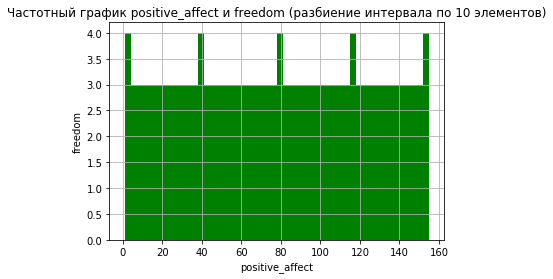

In [124]:
n, bins, patches = plt.hist(df['freedom'], 50, facecolor='g')

plt.xlabel('positive_affect')
plt.ylabel('freedom')
plt.title('Частотный график positive_affect и freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show();

Это равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [125]:
df['freedom'].describe()

count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: freedom, dtype: float64

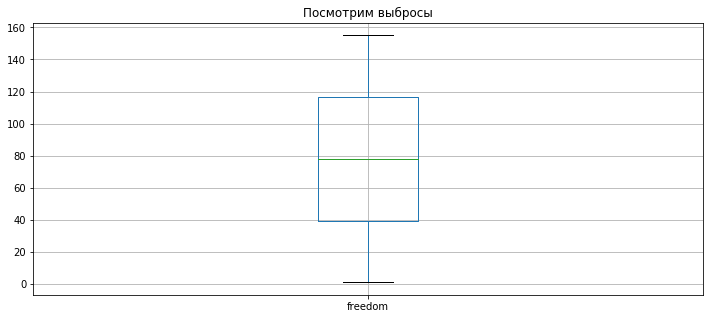

In [126]:
title_n = 'Посмотрим выбросы';
df['freedom'].plot.box(grid=True, figsize=(12, 5), title = title_n);

все очень хорошо!

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
country                    156 non-null object
ladder                     156 non-null int64
sd_of_ladder               156 non-null int64
positive_affect            155 non-null float64
negative_affect            155 non-null float64
social_support             155 non-null float64
freedom                    155 non-null float64
corruption                 148 non-null float64
generosity                 155 non-null float64
log_of_gdp_nper_capita     152 non-null float64
health_life_nexpectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [128]:
mean_freedom = df['freedom'].mean()
df['freedom'] = df['freedom'].fillna(mean_freedom)
df['freedom'] = df['freedom'].astype('int')

In [129]:
mean_freedom = df['positive_affect'].mean()
df['positive_affect'] = df['positive_affect'].fillna(mean_freedom)
df['positive_affect'] = df['positive_affect'].astype('int')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
country                    156 non-null object
ladder                     156 non-null int64
sd_of_ladder               156 non-null int64
positive_affect            156 non-null int64
negative_affect            155 non-null float64
social_support             155 non-null float64
freedom                    156 non-null int64
corruption                 148 non-null float64
generosity                 155 non-null float64
log_of_gdp_nper_capita     152 non-null float64
health_life_nexpectancy    150 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 13.5+ KB


Коэффициент корреляции Пирсона: 0.6817698430601657


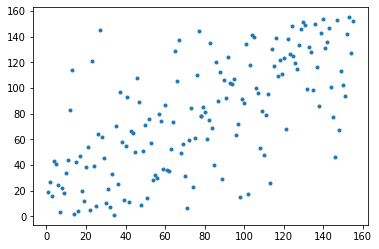

In [131]:
from scipy.stats import pearsonr
x,y = df['freedom'], df['positive_affect']
corr, p_value = pearsonr(x,y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [132]:
x1 = x - statistics.mean(x)
statistics.mean(x1)

0

In [133]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True)
x2 = minmax_scale.fit_transform(np.array(x1).reshape(-1,1))

print(min(x2))
print(max(x2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

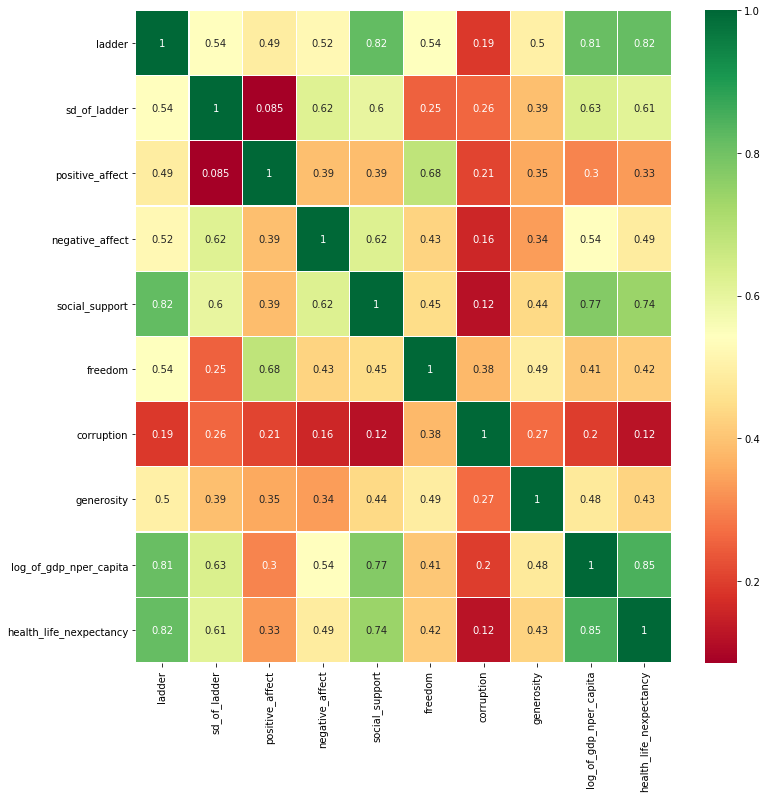

In [134]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [135]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

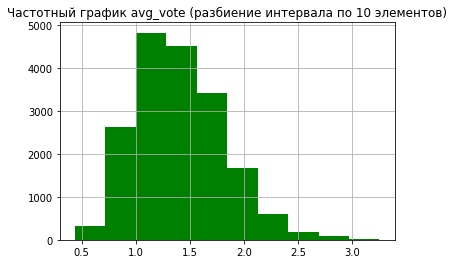

In [136]:
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

#### Возможно логнормальное распределние

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.2083170484878848


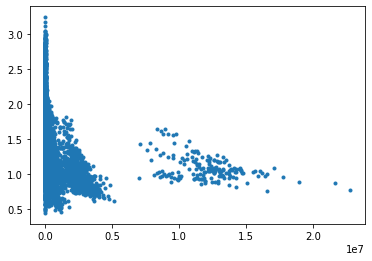

In [137]:
x,y = df['4046'], df['AveragePrice']
corr, p_value = pearsonr(x,y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)